**Scraping Data**

Mendapatkan Endpoint API

In [ ]:
import requests

url = 'https://restcountries.com/v3.1/all'
response = requests.get(url)

if response.status_code == 200:
    print('Request Berhasil!')
else:
    print('Request Gagal!', response.status_code)

Request Berhasil!


Kode ini digunakan untuk melakukan permintaan data ke API dan memeriksa apakah permintaan berhasil atau gagal berdasarkan status kode yang diterima. Diperoleh output "Request Berhasil!" yang menunjukkan bahwa permintaan HTTP GET yang dikirimkan ke API berhasil dan respons yang diterima memiliki status kode 200. Status kode 200 menunjukkan bahwa permintaan berhasil diproses oleh server dan data yang diminta telah berhasil diperoleh.

Konversi Data ke Struktur Python

In [ ]:
response.json()

[{'name': {'common': 'Botswana',
   'official': 'Republic of Botswana',
   'nativeName': {'eng': {'official': 'Republic of Botswana',
     'common': 'Botswana'},
    'tsn': {'official': 'Lefatshe la Botswana', 'common': 'Botswana'}}},
  'tld': ['.bw'],
  'cca2': 'BW',
  'ccn3': '072',
  'cioc': 'BOT',
  'independent': True,
  'status': 'officially-assigned',
  'unMember': True,
  'currencies': {'BWP': {'symbol': 'P', 'name': 'Botswana pula'}},
  'idd': {'root': '+2', 'suffixes': ['67']},
  'capital': ['Gaborone'],
  'altSpellings': ['BW', 'Republic of Botswana', 'Lefatshe la Botswana'],
  'region': 'Africa',
  'subregion': 'Southern Africa',
  'languages': {'eng': 'English', 'tsn': 'Tswana'},
  'latlng': [-22.0, 24.0],
  'landlocked': True,
  'borders': ['NAM', 'ZAF', 'ZMB', 'ZWE'],
  'area': 582000.0,
  'demonyms': {'eng': {'f': 'Motswana', 'm': 'Motswana'},
   'fra': {'f': 'Botswanaise', 'm': 'Botswanais'}},
  'cca3': 'BWA',
  'translations': {'ara': {'official': 'ÿ¨ŸÖŸáŸàÿ±Ÿäÿ© ÿ®Ÿà

`response.json()` mengubah data JSON yang diterima dalam respons menjadi struktur data Python, sehingga data dapat diakses dengan mudah.

**Preprocessing**

Menghitung Jumlah Negara

In [ ]:
# Menghitung jumlah negara
jumlah_negara = len(response.json())
print(f'Jumlah negara: {jumlah_negara}')

Jumlah negara: 250


`len(response.json())` dan fungsi `len()` digunakan untuk menghitung jumlah elemen dalam data yang diterima, jika data yang diterima dalam bentuk list atau dictionary, maka `len()` akan menghitung berapa banyak elemen di dalamnya.

Bagian ini bertujuan untuk menghitung jumlah negara yang ada dalam data yang diterima dari API, sehingga dapat mengetahui seberapa banyak negara yang tercatat dalam data yang diberikan oleh API.

Deskripsi Data

In [ ]:
# Melihat seluruh variabel yang ada pada response
keys = response.json()[0].keys()
keys

dict_keys(['name', 'tld', 'cca2', 'ccn3', 'cioc', 'independent', 'status', 'unMember', 'currencies', 'idd', 'capital', 'altSpellings', 'region', 'subregion', 'languages', 'latlng', 'landlocked', 'borders', 'area', 'demonyms', 'cca3', 'translations', 'flag', 'maps', 'population', 'gini', 'fifa', 'car', 'timezones', 'continents', 'flags', 'coatOfArms', 'startOfWeek', 'capitalInfo', 'postalCode'])

`keys` digunakan untuk mengambil kunci-kunci (keys) yang ada dalam dictionary di mana `keys()` akan mengembalikan daftar nama variabel atau atribut yang tersedia dalam dictionary negara pertama.

Bagian ini bertujuan untuk melihat seluruh nama variabel (kunci) yang ada dalam objek data pertama yang diterima dari API, sehingga dapat mengetahui informasi apa saja yang tersedia dalam data tersebut seperti nama negara, bahasa, luas wilayah, populasi, dan sebagainya.

In [ ]:
import pandas as pd

# Tipe data dari setiap variabel
deskripsi_variabel_keys = pd.DataFrame({
    'Variabel': list(keys),
    'Tipe Data': [type(response.json()[0].get(key)).__name__ for key in keys],
})
deskripsi_variabel_keys

Variabel Tipe Data
0           name      dict
1            tld      list
2           cca2       str
3           ccn3       str
4           cioc       str
5    independent      bool
6         status       str
7       unMember      bool
8     currencies      dict
9            idd      dict
10       capital      list
11  altSpellings      list
12        region       str
13     subregion       str
14     languages      dict
15        latlng      list
16    landlocked      bool
17       borders      list
18          area     float
19      demonyms      dict
20          cca3       str
21  translations      dict
22          flag       str
23          maps      dict
24    population       int
25          gini      dict
26          fifa       str
27           car      dict
28     timezones      list
29    continents      list
30         flags      dict
31    coatOfArms      dict
32   startOfWeek       str
33   capitalInfo      dict
34    postalCode      dict

`[type(response.json()[0].get(key)).__name__ for key in keys]` merupakan list comprehension yang digunakan sebagai berikut.
`response.json()[0].get(key)` berfungsi untuk mengambil nilai dari setiap kunci dalam data negara pertama (indeks 0).
`type(...).__name__` dan fungsi `type()` digunakan untuk mendapatkan tipe data dari nilai yang diambil, selanjutnya `__name__` digunakan untuk mendapatkan nama tipe data dalam bentuk str, int, list.

Bagian ini bertujuan untuk mengidentifikasi tipe data dari setiap variabel dalam data yang diterima dari API dan menyusunnya dalam format tabel atau Data Frame, sehingga dapat memahami jenis data yang ada dalam dataset dan memastikan data tersebut sesuai untuk analisis data lebih lanjut.

Membuat Data Frame Countries Data

In [ ]:
import pandas as pd

# Data country dari response
countries_data = response.json()

# Variabel yang akan disimpan
selected_data = []


for country in countries_data:
    country_info = {
        'name': country.get('name', {}).get('common', 'N/A'),  # Nama Negara
        'continent': country.get('continents', ['N/A'])[0],  # Kontinen
        'languages': ', '.join(country.get('languages', {}).values()),  # Bahasa
        'area': country.get('area', 'N/A'),  # Luas Wilayah
        'population': country.get('population', 'N/A'),  # Populasi
        'independent': country.get('independent', 'N/A'),  # Status Kemerdekaan
        'unMember': country.get('unMember', 'N/A'),  # Keanggotaan PBB
        'landlocked': country.get('landlocked', 'N/A')  # Tanah Terkunci
    }
    # Menambahkan data negara yang sudah difilter ke dalam list
    selected_data.append(country_info)

# Mengubah list of dict menjadi DataFrame
df = pd.DataFrame(selected_data)
df


name      continent             languages       area  \
0            Botswana         Africa       English, Tswana   582000.0   
1               Tonga        Oceania       English, Tongan      747.0   
2              Greece         Europe                 Greek   131990.0   
3    Marshall Islands        Oceania  English, Marshallese      181.0   
4             Belarus         Europe   Belarusian, Russian   207600.0   
..                ...            ...                   ...        ...   
245           Bahamas  North America               English    13943.0   
246          Eswatini         Africa        English, Swazi    17364.0   
247            Brazil  South America            Portuguese  8515767.0   
248         Lithuania         Europe            Lithuanian    65300.0   
249       Saint Lucia  North America               English      616.0   

     population  independent  unMember  landlocked  
0       2351625         True      True        True  
1        105697         True      True       False  
2      10715549         True      True       False  
3         59194         True      True       False  
4       9398861         True      True        True  
..          ...          ...       ...         ...  
245      393248         True      True       False  
246     1160164         True      True        True  
247   212559409         True      True       False  
248     2794700         True      True       False  
249      183629         True      True       False  

[250 rows x 8 columns]

`countries_data = response.json()` berfungsi untuk mengambil data negara yang diterima dari API dalam format JSON dan mengonversinya menjadi objek Python.

`selected_data = []` berfungsi untuk menyiapkan list kosong untuk menyimpan data yang telah difilter dan diproses dari countries_data.

`for country in countries_data::` sebagai iterasi untuk setiap negara dalam data yang diterima dari API.

`country_info = {...}` berfungsi untuk membuat dictionary untuk setiap negara yang berisi informasi penting seperti:
'name': Nama negara (dari kunci 'name' dengan nilai 'common').
'continent': Kontinen (dari kunci 'continents').
'languages': Bahasa yang digunakan (menggabungkan nilai bahasa dalam format string).
'area': Luas wilayah.
'population': Populasi.
'independent': Status kemerdekaan.
'unMember': Keanggotaan PBB.
'landlocked': Status tanah terkunci.

`selected_data.append(country_info)` berfungsi untuk menambahkan dictionary yang sudah difilter ke dalam list selected_data.

`df = pd.DataFrame(selected_data)` mengubah list of dictionaries menjadi DataFrame Pandas untuk memudahkan analisis dan manipulasi data.

Bagian ini bertujuan untuk memilih dan memformat informasi relevan (seperti nama negara, kontinen, bahasa, dll.) dari data API, dan menyimpannya dalam format DataFrame yang mudah dianalisis menggunakan Pandas.

Mengubah Nama Kolom

In [ ]:
# Mengubah nama kolom
df.columns = [
    'Nama Negara',
    'Benua',
    'Bahasa',
    'Luas Wilayah (km2)',
    'Populasi',
    'Status Kemerdekaan',
    'Keanggotaan PBB',
    'Tanah Terkunci'
]
df

Nama Negara          Benua                Bahasa  \
0            Botswana         Africa       English, Tswana   
1               Tonga        Oceania       English, Tongan   
2              Greece         Europe                 Greek   
3    Marshall Islands        Oceania  English, Marshallese   
4             Belarus         Europe   Belarusian, Russian   
..                ...            ...                   ...   
245           Bahamas  North America               English   
246          Eswatini         Africa        English, Swazi   
247            Brazil  South America            Portuguese   
248         Lithuania         Europe            Lithuanian   
249       Saint Lucia  North America               English   

     Luas Wilayah (km2)   Populasi  Status Kemerdekaan  Keanggotaan PBB  \
0              582000.0    2351625                True             True   
1                 747.0     105697                True             True   
2              131990.0   10715549                True             True   
3                 181.0      59194                True             True   
4              207600.0    9398861                True             True   
..                  ...        ...                 ...              ...   
245             13943.0     393248                True             True   
246             17364.0    1160164                True             True   
247           8515767.0  212559409                True             True   
248             65300.0    2794700                True             True   
249               616.0     183629                True             True   

     Tanah Terkunci  
0              True  
1             False  
2             False  
3             False  
4              True  
..              ...  
245           False  
246            True  
247           False  
248           False  
249           False  

[250 rows x 8 columns]

`df.columns = [...]` menetapkan nama baru untuk setiap kolom pada DataFrame df.
`df.columns` merupakan atribut yang berisi daftar nama kolom di DataFrame.

Dalam kode ini, nama kolom diubah menjadi lebih deskriptif yaitu sebagai berikut.
- Nama Negara
- Benua
- Bahasa
- Luas Wilayah (km¬≤)
- Populasi
- Status Kemerdekaan
- Keanggotaan PBB
- Tanah Terkunci

Bagian ini bertujuan untuk memperjelas nama-nama kolom dalam DataFrame sehingga informasi yang ditampilkan lebih mudah dipahami.

Mapping Kontinen ke 7 Benua

In [ ]:
# Mengetahui kontinen yang ada pada data
df['Benua'].unique()

array(['Africa', 'Oceania', 'Europe', 'North America', 'Asia',
       'South America', 'Antarctica'], dtype=object)

`df['Benua']` untuk mengakses kolom 'Benua' pada DataFrame df, yang berisi nama kontinen untuk setiap negara.

`.unique()` berfungsi untuk mengembalikan nilai unik (tanpa duplikasi) yang ada dalam kolom 'Benua' yang berarti menampilkan daftar nama benua yang ada dalam data yang tersedia.

Bagian ini bertujuan untuk mengidentifikasi semua kontinen yang tercatat dalam data tanpa duplikasi, sehingga dapat mengetahui variasi benua yang ada dalam dataset.

In [ ]:
# Mapping kontinen ke 5 benua
continent_mapping = {
    'Africa': 'Afrika',
    'Oceania': 'Australia',
    'Europe': 'Eropa',
    'North America': 'Amerika Utara',
    'South America': 'Amerika Selatan',
    'Asia': 'Asia',
    'Antarctica': 'Antartika'
}

# Mengelompokkan kontinen
df['Benua'] = df['Benua'].map(continent_mapping)
df['Benua'].unique()

array(['Afrika', 'Australia', 'Eropa', 'Amerika Utara', 'Asia',
       'Amerika Selatan', 'Antartika'], dtype=object)

Bagian ini bertujuan untuk menerjemahkan nama-nama benua dari bahasa Inggris ke dalam bahasa Indonesia dan memastikan bahwa kolom 'Benua' dalam DataFrame sekarang berisi nama kontinen dalam bahasa Indonesia.

Mengecek Missing Value dan Persentase

In [ ]:
import pandas as pd

# Mengecek missing value dan persentase missing value
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Membuat Data Frame untuk menampilkan missing value dan persentasenya
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
missing_data

Missing Values  Percentage (%)
Nama Negara                      0             0.0
Benua                            0             0.0
Bahasa                           0             0.0
Luas Wilayah (km2)               0             0.0
Populasi                         0             0.0
Status Kemerdekaan               0             0.0
Keanggotaan PBB                  0             0.0
Tanah Terkunci                   0             0.0

**Interpretasi**

Berdasarkan output di atas diperoleh `missing value` dan `percentage` untuk seluruh variabel, terlihat bahwa missing value seluruh variabel bernilai 0 yang menunjukkan bahwa tidak terdapat missing value pada seluruh variabel, sehingga dapat disimpulkan bahwa dataset ini tidak memiliki misssing value sama sekali.

Mengecek Duplikasi Data

In [ ]:
# Mengecek duplikasi data
duplicate_data = df.duplicated().sum()
print(f'Jumlah data duplikat: {duplicate_data}')

Jumlah data duplikat: 0


**Interpretasi**

Berdasarkan output di atas diperoleh jumlah data duplikat bernilai 0 yang menunjukkan bahwa tidak ada duplikasi nilai dalam dataset.

Membuat Feature Baru

In [ ]:
# Membuat variabel baru yaitu Kepadatan Penduduk
df['Kepadatan Penduduk (jiwa/km2)'] = df['Populasi'] / df['Luas Wilayah (km2)']

# Membulatkan variabel baru Kepadatan Penduduk
df['Kepadatan Penduduk (jiwa/km2)'] = df['Kepadatan Penduduk (jiwa/km2)'].astype(int)

Bagian ini bertujuan untuk membuat feature baru yaitu Kepadatan Penduduk yang diperoleh dengan cara membagi Populasi dengan Luas Wilayah (km2) dan mengubahnya menjadi tipe data integer.

Data Cleaned

In [ ]:
df

Nama Negara            Benua                Bahasa  \
0            Botswana           Afrika       English, Tswana   
1               Tonga        Australia       English, Tongan   
2              Greece            Eropa                 Greek   
3    Marshall Islands        Australia  English, Marshallese   
4             Belarus            Eropa   Belarusian, Russian   
..                ...              ...                   ...   
245           Bahamas    Amerika Utara               English   
246          Eswatini           Afrika        English, Swazi   
247            Brazil  Amerika Selatan            Portuguese   
248         Lithuania            Eropa            Lithuanian   
249       Saint Lucia    Amerika Utara               English   

     Luas Wilayah (km2)   Populasi  Status Kemerdekaan  Keanggotaan PBB  \
0              582000.0    2351625                True             True   
1                 747.0     105697                True             True   
2              131990.0   10715549                True             True   
3                 181.0      59194                True             True   
4              207600.0    9398861                True             True   
..                  ...        ...                 ...              ...   
245             13943.0     393248                True             True   
246             17364.0    1160164                True             True   
247           8515767.0  212559409                True             True   
248             65300.0    2794700                True             True   
249               616.0     183629                True             True   

     Tanah Terkunci  Kepadatan Penduduk (jiwa/km2)  
0              True                              4  
1             False                            141  
2             False                             81  
3             False                            327  
4              True                             45  
..              ...                            ...  
245           False                             28  
246            True                             66  
247           False                             24  
248           False                             42  
249           False                            298  

[250 rows x 9 columns]

Data cleaned di atas benar-benar bersih tidak ada missing value dan data duplikasi sehingga siap digunakan untuk analisis data lebih lanjut mencakup 9 feature atau variabel yaitu sebagai berikut.
- Nama Negara
- Benua
- Bahasa
- Luas Wilayah (km¬≤)
- Populasi
- Status Kemerdekaan
- Keanggotaan PBB
- Tanah Terkunci
- Kepadatan Penduduk (jiwa/km2)

**Exploratory Data Analysis (EDA)**

Jumlah Negara di Setiap Benua

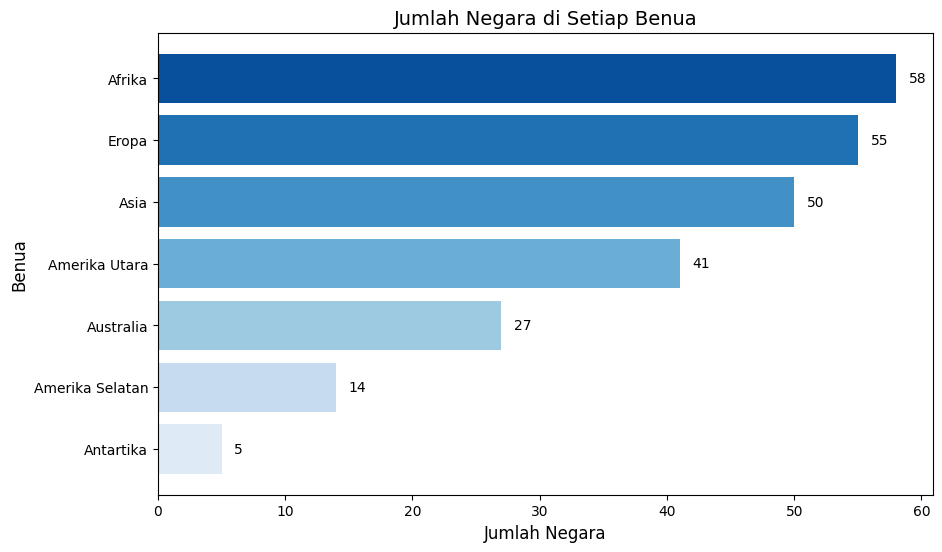

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah negara di setiap benua dan mengurutkan secara naik
continent_counts = df['Benua'].value_counts().sort_values()

# Membuat horizontal bar chart untuk distribusi jumlah negara di setiap benua
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues", len(continent_counts))
bars = plt.barh(continent_counts.index, continent_counts.values, color=colors)

# Menambahkan label frekuensi pada setiap bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), va='center', fontsize=10)

plt.title('Jumlah Negara di Setiap Benua', fontsize=14)
plt.xlabel('Jumlah Negara', fontsize=12)
plt.ylabel('Benua', fontsize=12)
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh jumlah negara pada setiap benua di dunia mulai dari benua dengan jumlah negara paling banyak ke paling sedikit yaitu sebagai berikut.
- Afrika merupakan benua dengan jumlah negara paling banyak yaitu 58 negara
- Eropa merupakan benua dengan jumlah negara paling banyak setelah Afrika yaitu 55 negara
- Asia merupakan benua yang memiliki jumlah negara sebanyak 50 negara
- Amerika Utara merupakan benua yang memiliki jumlah negara sebanyak 41 negara
- Australia merupakan benua yang memiliki jumlah negara sebanyak 27 negara
- Amerika Selatan merupakan benua dengan jumlah negara paling sedikit setelah Antartika yaitu 14 negara
- Antartika merupakan benua dengan jumlah negara paling sedikit yaitu 5 negara

Top 10 Bahasa Paling Populer di Dunia

C:\Users\Andriansah\AppData\Local\Temp\ipykernel_9980\1958972834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


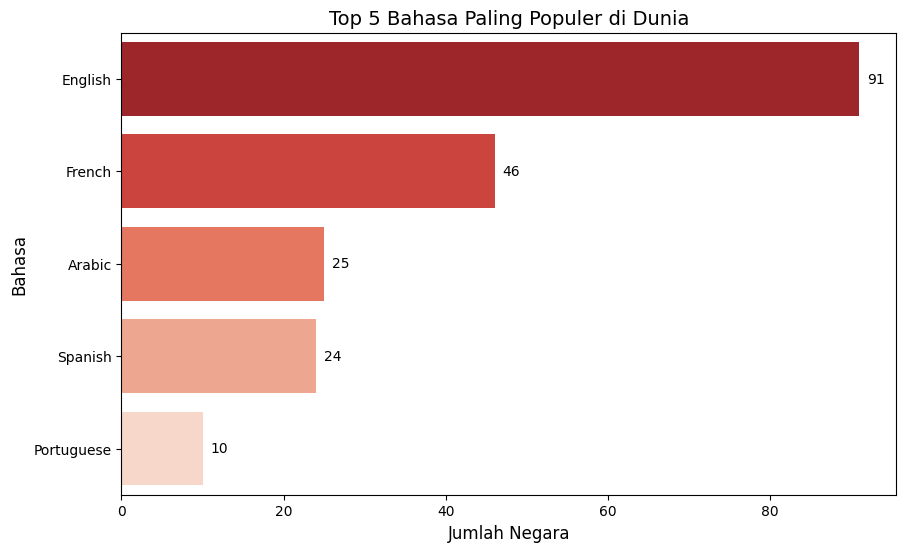

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Split bahasa yang ada di dalam kolom 'Bahasa' dan hitung frekuensinya
languages_series = df['Bahasa'].str.split(',').explode().str.strip()

# Hitung frekuensi bahasa
language_counts = languages_series.value_counts().head(5)

# Bar chart Top 5 Bahasa Paling Populer di Dunia dengan gradasi merah dari atas
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Reds", len(language_counts))[::-1]  # Membalik urutan warna untuk gradasi dari atas
bars = sns.barplot(
    x=language_counts.values,
    y=language_counts.index,
    palette=colors,
)

# Menambahkan label pada setiap bar
for bar in bars.patches:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), va='center')

plt.title('Top 5 Bahasa Paling Populer di Dunia', fontsize=14)
plt.xlabel('Jumlah Negara', fontsize=12)
plt.ylabel('Bahasa', fontsize=12)
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh 5 bahasa paling populer atau paling banyak digunakan sebagai bahasa resmi oleh berbagai negara di dunia yaitu sebagai berikut.
- English atau Bahasa Inggris merupakan bahasa paling populer nomor 1 yang berartri paling banyak digunakan di berbagai negara yaitu ada sebanyak 91 negara yang menggunakan Bahasa Inggris sebagai salah satu bahasa resmi pada 91 negara tersebut.
- French atau Bahasa Prancis merupakan bahasa paling populer nomor 2 yang berarti banyak digunakan di berbagai negara yaitu ada sebanyak 46 negara yang mmenggunakan Bahasa Prancis sebagai salah satu bahasa resmi pada 46 negara tersebut.
- Arabic atau Bahasa Arab merupakan salah satu bahasa paling populer yang berarti banyak digunakan di berbagai negara yaitu ada sebanyak 25 negara yang mengguankan Bahasa Arab sebagai salah satu bahasa resmi pada 25 negara tersebut.
- Spanish atau Bahasa Spanyol merupakan salah satu bahasa paling populer setelah Bahasa Arab yang berarti banyak digunakan di berbagai negara yaitu ada sebanyak 24 negara yang menggunakan Bahasa Spanyol sebagai salah satu bahasa resmi pada 24 negara tersebut.
- Portuguese atau Bahasa Portugis merupakan salah satu bahasa paling populer setelah Bahasa Spanyol atau banyak digunakan di berbagai negara yaitu ada sebanyak 10 negara yang menggunakan Bahasa Portugis sebagai salah satu bahasa resmi pada 10 negara tersebut.


Distribusi Luas Wilayah Berdasarkan Benua

C:\Users\Andriansah\AppData\Local\Temp\ipykernel_9980\2964762725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Benua', y='Luas Wilayah (km2)', data=df, palette='Set2')


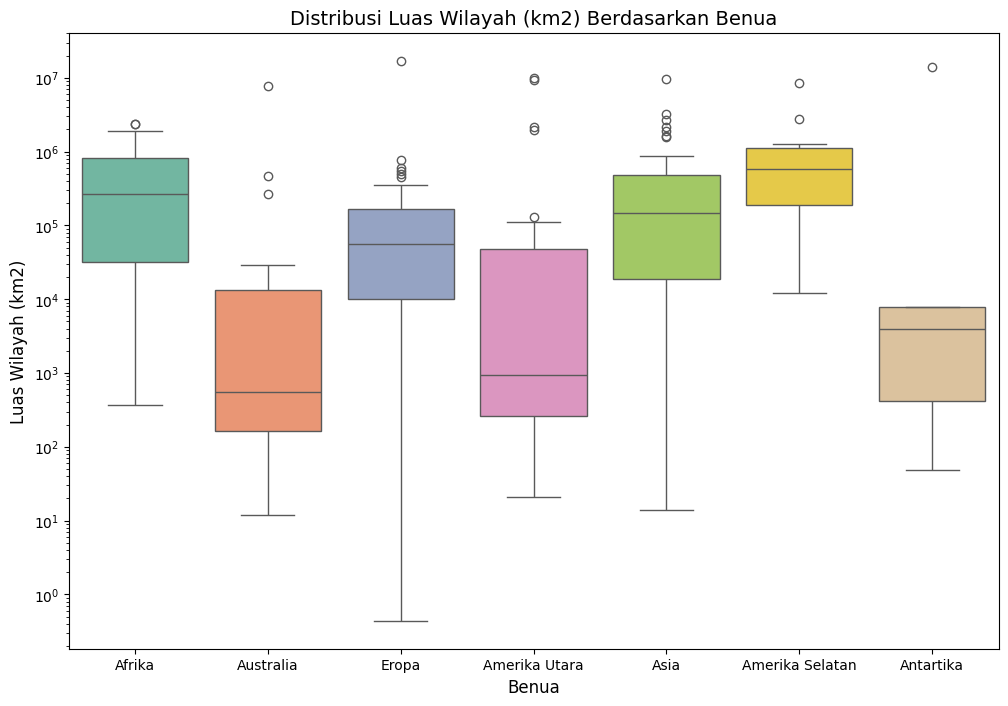

In [ ]:
# Membuat boxplot vertikal untuk distribusi Luas Wilayah (km2) berdasarkan Benua dengan skala logaritmik
plt.figure(figsize=(12, 8))
sns.boxplot(x='Benua', y='Luas Wilayah (km2)', data=df, palette='Set2')
plt.yscale('log')  # Mengatur skala logaritmik pada sumbu y

plt.title('Distribusi Luas Wilayah (km2) Berdasarkan Benua', fontsize=14)
plt.xlabel('Benua', fontsize=12)
plt.xticks(rotation=0)  # Mengatur rotasi label X menjadi 0 derajat
plt.ylabel('Luas Wilayah (km2)', fontsize=12)
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh boxplot luas wilayah (km2) berbagai negara di dunia berdasarkan Benua diperoleh kesimpulan sebagai berikut.
- Luas wilayah (km2) berbagai negara di Benua Afrika tidak berdistribusi normal, terlihat bahwa terdapat 1 outlier yang berarti bahwa terdapat 1 negara di Benua Afrika yang memiliki luas wilayah (km2) di atas rata-rata, bentuk boxplot tidak simetris atau sedikit menjuring ke bawah yang menunjukkan bahwa sebagian besar negara di Benua Afrika memiliki luas wilayah (km2) yang lebih kecil dari daripada median.
- Luas wilayah (km2) berbagai negara di Benua Australia tidak berdistribusi normal, terlihat bahwa terdapat 3 outlier yang berarti bahwa terdapat 3 negara di Benua Australia yang memiliki luas wilayah (km2) di atas rata-rata, bentuk boxplot tidak simetris atau menjuring ke atas yang menunjukkan bahwa sebagian besar negara di Benua Afrika memiliki luas wilayah (km2) yang lebih besar dari daripada median.
- Luas wilayah (km2) berbagai negara di Benua Eropa tidak berdistribusi normal, terlihat bahwa terdapat cukup banyak outlier dan bentuk boxplot tidak simetris atau sedikit menjuring ke bawah yang menunjukkan bahwa sebagian besar negara di Benua Eropa memiliki luas wilayah (km2) yang lebih kecil dari daripada median.
- Luas wilayah (km2) berbagai negara di Benua Eropa tidak berdistribusi normal, terlihat bahwa terdapat cukup banyak outlier dan bentuk boxplot tidak simetris atau sedikit menjuring ke bawah yang menunjukkan bahwa sebagian besar negara di Benua Eropa memiliki luas wilayah (km2) yang lebih kecil dari daripada median.
- Luas wilayah (km2) berbagai negara di Benua Amerika Utara tidak berdistribusi normal, terlihat bahwa terdapat cukup banyak outlier dan bentuk boxplot tidak simetris atau menjuring ke atas yang menunjukkan bahwa sebagian besar negara di Benua Amerika Utara memiliki luas wilayah (km2) yang lebih besar dari daripada median.
- Luas wilayah (km2) berbagai negara di Benua Asia tidak berdistribusi normal, terlihat bahwa terdapat cukup banyak outlier dan bentuk boxplot tidak simetris atau menjuring ke bawah yang menunjukkan bahwa sebagian besar negara di Benua Asia memiliki luas wilayah (km2) yang lebih kecil dari daripada median.
- Luas wilayah (km2) berbagai negara di Benua Antartika tidak berdistribusi normal, terlihat bahwa terdapat cukup banyak outlier dan bentuk boxplot tidak simetris atau sedikit menjuring ke bawah yang menunjukkan bahwa sebagian besar negara di Benua Antartika memiliki luas wilayah (km2) yang lebih kecil dari daripada median.

Distribusi Populasi Setiap Benua

C:\Users\Andriansah\AppData\Local\Temp\ipykernel_9980\1947301113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Benua', y='Populasi', data=df, palette='coolwarm')
C:\Users\Andriansah\AppData\Local\Temp\ipykernel_9980\1947301113.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e10)  # Menyesuaikan batas skala logaritmik


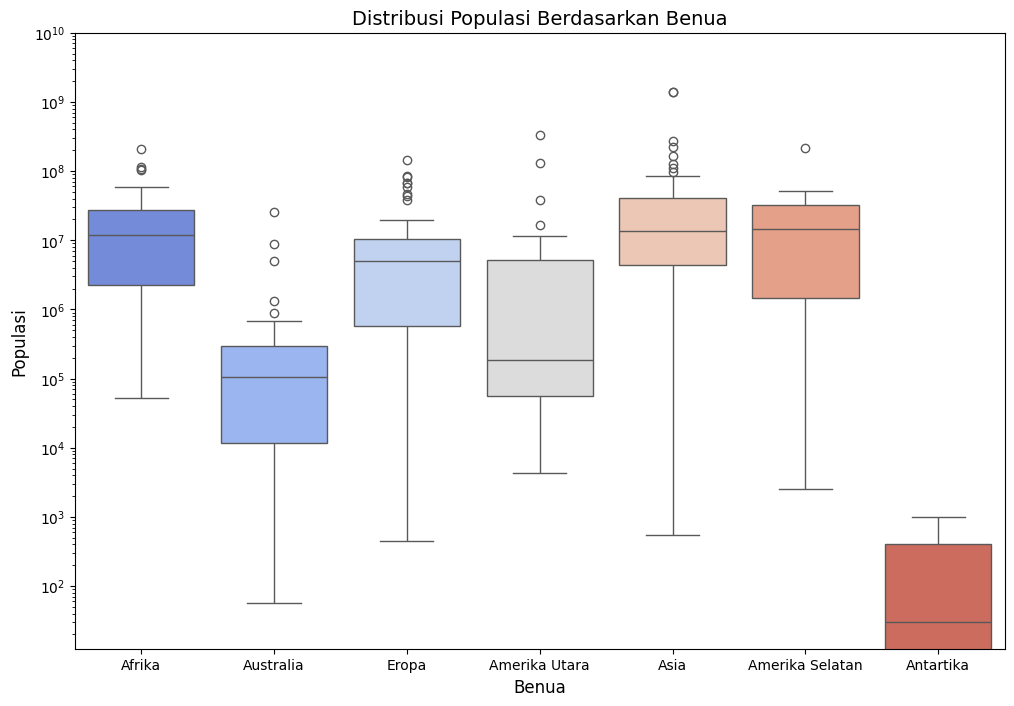

In [ ]:
# Membuat boxplot untuk distribusi populasi berdasarkan benua
plt.figure(figsize=(12, 8))
sns.boxplot(x='Benua', y='Populasi', data=df, palette='coolwarm')

# Menambahkan judul dan label
plt.title('Distribusi Populasi Berdasarkan Benua', fontsize=14)
plt.xlabel('Benua', fontsize=12)
plt.xticks(rotation=0)  # Mengatur rotasi label X menjadi 0 derajat
plt.ylabel('Populasi', fontsize=12)
plt.yscale('log')  # Mengatur skala logaritmik pada sumbu y
plt.ylim(0, 1e10)  # Menyesuaikan batas skala logaritmik
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh boxplot populasi berbagai negara di dunia berdasarkan benua diperoleh kesimpulan sebagai berikut.
- Populasi berbagai negara di Benua Afrika tidak berdistribusi normal, terlihat bahwa terdapat cukup banyak outlier yang berarti bahwa terdapat beberapa negara di Benua Afrika yang memiliki populasi di atas rata-rata, bentuk boxplot tidak simetris atau menjuring ke bawah yang menunjukkan bahwa sebagian besar negara di Benua Afrika memiliki populasi yang lebih sedikit daripada median.
- Populasi berbagai negara di Benua Australia tidak berdistribusi normal, terlihat bahwa terdapat 5 outlier yang berarti bahwa terdapat 5 negara di Benua Australia yang memiliki populasi di atas rata-rata, bentuk boxplot tidak simetris atau menjuring ke bawah yang menunjukkan bahwa sebagian besar negara di Benua Australia memiliki populasi yang lebih sedikit daripada median.
- Populasi berbagai negara di Benua Eropa tidak berdistribusi normal, terlihat bahwa terdapat cukup banyak outlier yang berarti bahwa terdapat beberapa negara di Benua Eropa yang memiliki populasi di atas rata-rata, bentuk boxplot tidak simetris atau menjuring ke bawah yang menunjukkan bahwa sebagian besar negara di Benua Eropa memiliki populasi yang lebih sedikit daripada median.
- Populasi berbagai negara di Benua Amerika Utara tidak berdistribusi normal, terlihat bahwa terdapat 4 outlier yang berarti bahwa terdapat 4 negara di Benua Amerika Utara yang memiliki populasi di atas rata-rata, bentuk boxplot tidak simetris atau menjuring ke atas yang menunjukkan bahwa sebagian besar negara di Benua Amerika Utara memiliki populasi yang lebih banyak daripada median.
- Populasi berbagai negara di Benua Asia tidak berdistribusi normal, terlihat bahwa terdapat cukup banyak outlier yang berarti bahwa terdapat beberapa negara di Benua Asia yang memiliki populasi di atas rata-rata, bentuk boxplot simetris yang menunjukkan bahwa negara di Benua Asia memiliki populasi yang lebih berada di sekitar median, namun jumlah populasi di Benua Asia ini memiliki ketimpangan yang ditunjukkan oleh adanya lower whisker yang sangat panjang.
- Populasi berbagai negara di Benua Amerika Selatan tidak berdistribusi normal, terlihat bahwa terdapat 1 outlier yang berarti bahwa terdapat 1 negara di Benua Amerika Selatan yang memiliki populasi di atas rata-rata, bentuk boxplot tidak simetris atau menjuring ke bawah menunjukkan bahwa negara di Benua Amerika Selatan memiliki populasi yang lebih sedikit daripada median, namun jumlah populasi di Benua Amerika Selatan ini memiliki ketimpangan yang ditunjukkan oleh adanya lower whisker yang sangat panjang.
- Populasi berbagai negara di Benua Antartika tidak berdistribusi normal, terlihat bahwa bentuk boxplot tidak simetris atau menjuring ke atas yang menunjukkan bahwa negara di Benua Antartika memiliki populasi yang lebih banyak daripada median, terlihat juga tidak adanya lower whisker pada boxplot dan batas bawah boxplot dimulai dari 0 menunjukkan bahwa terdapat negara di Benua Antartika yang tidak memiliki populasi atau 0.

Total Populasi Setiap Benua

C:\Users\Andriansah\AppData\Local\Temp\ipykernel_9980\782496914.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


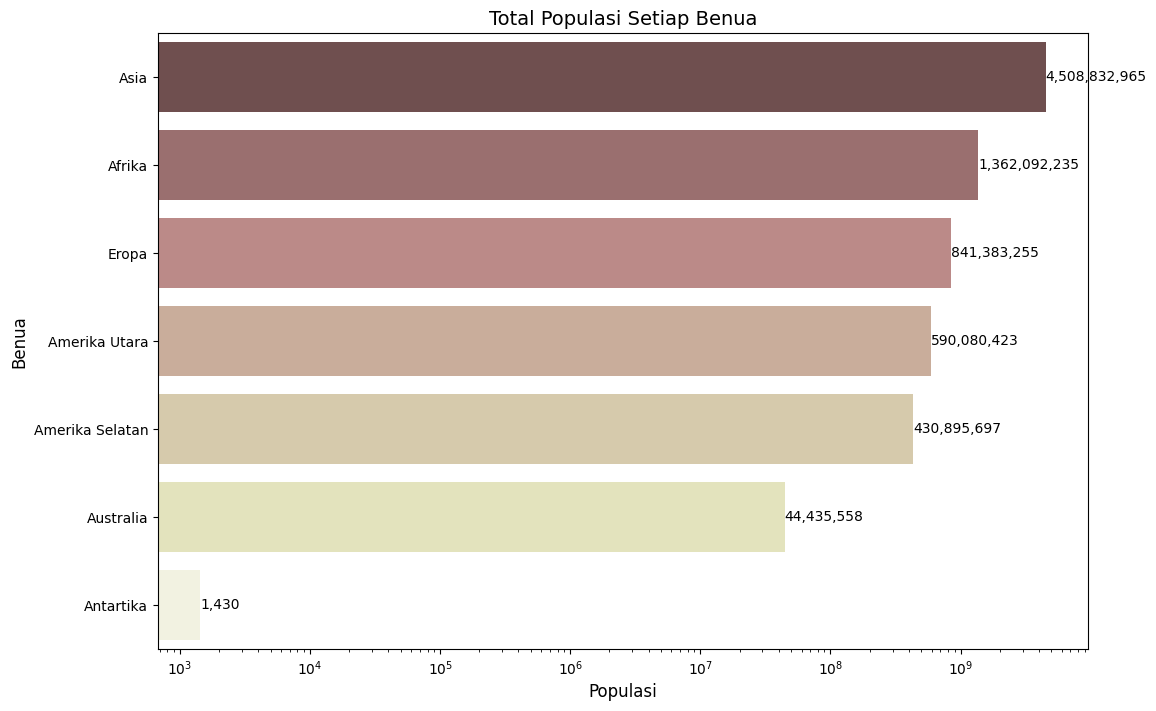

In [ ]:
# Menghitung total populasi setiap benua
population_per_continent = df.groupby('Benua')['Populasi'].sum().sort_values(ascending=False)

# Membuat bar chart dengan warna menarik
plt.figure(figsize=(12, 8))
colors = sns.color_palette("pink", len(population_per_continent))
bars = sns.barplot(
    x=population_per_continent.values,
    y=population_per_continent.index,
    palette=colors
)

# Menambahkan label pada setiap bar
for bar in bars.patches:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):,}', va='center')

# Menambahkan judul dan label
plt.title('Total Populasi Setiap Benua', fontsize=14)
plt.xlabel('Populasi', fontsize=12)
plt.ylabel('Benua', fontsize=12)
plt.xscale('log')  # Mengatur skala logaritmik pada sumbu x
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh bar chart total populasi di setiap benua diperoleh kesimpulan sebagai berikut.
- Benua Asia merupakan benua paling banyak atau nomor 1 berdasarkan jumlah penduduk yaitu lebih dari 4,5 miliar penduduk
- Benua Afrika merupakan benua dengan jumlah penduduk terbanyak nomor 2 setelah Benua Asia yaitu lebih dari 1,3 miliar penduduk
- Benua Eropa merupakan benua dengan jumlah penduduk terbanyak setelah Benua Afrika yaitu lebih dari 840 juta penduduk
- Benua Amerika Utara merupakan benua dengan jumlah penduduk lebih dari 590 juta penduduk
- Benua Amerika Selatan merupakan benua dengan jumlah penduduk lebih sedikit dibandingkan Benua Amerika Utara yaitu lebih dari 430 juta penduduk
- Benua Australia merupakan benua palling sedikit setelah Benua Antartika berdasarkan jumlah penduduk yaitu sekitar 44 juta penduduk
- Benua Antartika merupakan benua paling sedikit atau nomor 1 berdasarkan jumlah penduduk yaitu hanyak sekitar 1430 penduduk

Scatter Plot Luas Wilayah vs Populasi

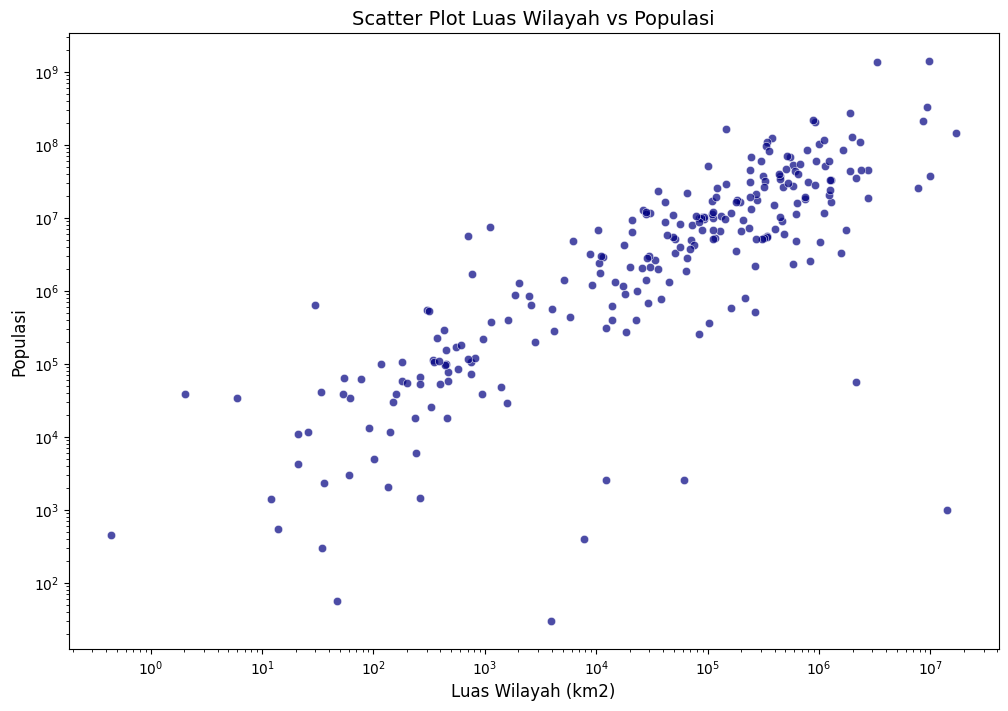

In [ ]:
# Membuat scatter plot untuk seluruh dunia
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Luas Wilayah (km2)',
    y='Populasi',
    data=df,
    alpha=0.7,
    color='navy'  # Mengatur warna plot menjadi navy
)

# Menambahkan judul dan label
plt.title('Scatter Plot Luas Wilayah vs Populasi', fontsize=14)
plt.xlabel('Luas Wilayah (km2)', fontsize=12)
plt.ylabel('Populasi', fontsize=12)
plt.xscale('log')  # Mengatur skala logaritmik pada sumbu x
plt.yscale('log')  # Mengatur skala logaritmik pada sumbu y
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh scatter plot antara Luas Wilayah (km2) dengan Poulasi, terlihat bahwa scaterr plot membentuk pola garis lurus miring dengan gradien mendekati 1 yang menunjukkan bahwa semakin luas wilayah suatu negara maka jumlah populasi yang ada pada negara tersebut juga akan semakin banyak, sehingga dapat disimpulkan bahwa terdapat hubungan linear positif antara Luas Wilayah (km2) dengan Populasi.

Status Kemerdekaan

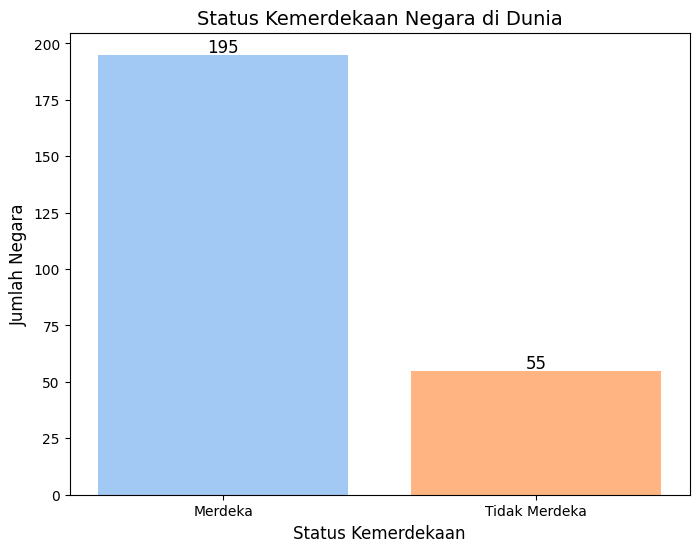

In [ ]:
# Menghitung jumlah negara berdasarkan status kemerdekaan
independence_counts = df['Status Kemerdekaan'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette("pastel", len(independence_counts))
bars = plt.bar(independence_counts.index.map({True: 'Merdeka', False: 'Tidak Merdeka'}),
               independence_counts.values, color=colors)

# Menambahkan label pada setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(bar.get_height()),
             ha='center', fontsize=12)

# Menambahkan judul dan label
plt.title('Status Kemerdekaan Negara di Dunia', fontsize=14)
plt.xlabel('Status Kemerdekaan', fontsize=12)
plt.ylabel('Jumlah Negara', fontsize=12)
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh bar chart status kemerdekaan negara di dunia, terlihat bahwa terdapat ketimpangan antar negara dengan status merdeka yaitu ada sebanyak 195 negara di mana lebih banyak dibandingkan negara dengan status tidak merdeka hanya sekitar 55 negara yang berarti bahwa negara di dunia mayoritas memiliki status kemerdekaan.

Keanggotaan PBB

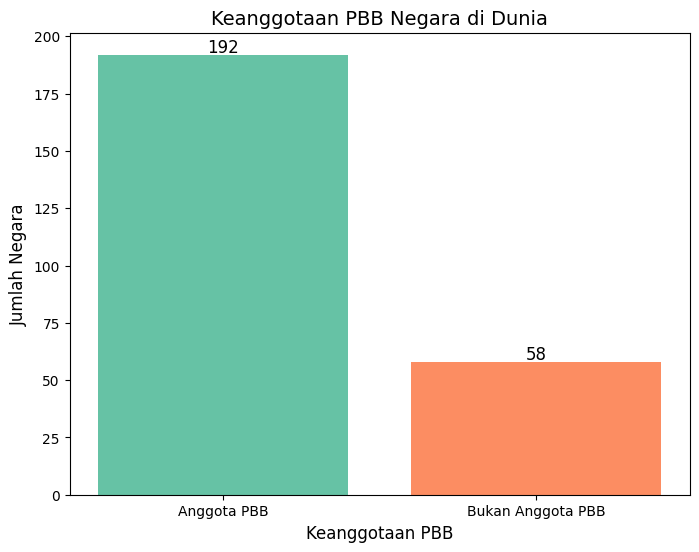

In [ ]:
# Menghitung jumlah negara berdasarkan keanggotaan PBB
un_membership_counts = df['Keanggotaan PBB'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Set2", len(un_membership_counts))
bars = plt.bar(un_membership_counts.index.map({True: 'Anggota PBB', False: 'Bukan Anggota PBB'}),
               un_membership_counts.values, color=colors)

# Menambahkan label pada setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(bar.get_height()),
             ha='center', fontsize=12)

# Menambahkan judul dan label
plt.title('Keanggotaan PBB Negara di Dunia', fontsize=14)
plt.xlabel('Keanggotaan PBB', fontsize=12)
plt.ylabel('Jumlah Negara', fontsize=12)
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh bar chart keanggotaan PBB, terlihat bahwa terdapat ketimpangan antar negara yang merupakan anggota PBB yaitu ada sebanyak 192 negara di mana lebih banyak dibandingkan negara yang bukan merupakan anggota PBB yaitu hanya sekitar 58 negara yang berarti bahwa negara di dunia mayoritas merupakan anggota PBB.

Grouped Bar Chart Status Kemerdekaan dan Keanggotaan PBB

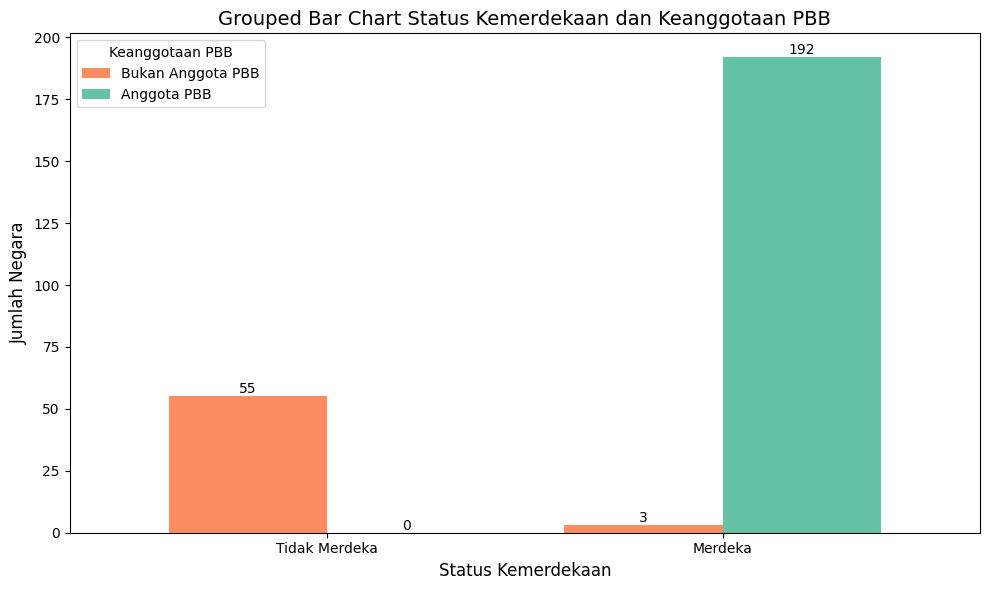

In [ ]:
# Menghitung jumlah negara berdasarkan status kemerdekaan dan keanggotaan PBB
grouped_counts = df.groupby(['Status Kemerdekaan', 'Keanggotaan PBB']).size().unstack(fill_value=0)
grouped_counts.index = ['Tidak Merdeka', 'Merdeka']

# Membalik urutan warna
colors = sns.color_palette("Set2", len(grouped_counts))[::-1]

# Membuat grouped bar chAart dengan warna yang dibalik
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', color=colors, width=0.8, ax=plt.gca())

# Menambahkan label pada setiap bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Menambahkan judul dan label
plt.title('Grouped Bar Chart Status Kemerdekaan dan Keanggotaan PBB', fontsize=14)
plt.xlabel('Status Kemerdekaan', fontsize=12)
plt.ylabel('Jumlah Negara', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Tidak Merdeka', 'Merdeka'], rotation=0)
plt.legend(title='Keanggotaan PBB', labels=['Bukan Anggota PBB', 'Anggota PBB'], fontsize=10)
plt.tight_layout()
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh grouped bar chart status kemerdekaan dan keanggotaan PBB, terlihat bahwa tidak ada negara anggota PBB yang memiliki status tidak merdeka, hanya ada 3 negara yang memiliki status merdeka bukan anggota PBB yang menunjukkan bahwa negara bukan anggota PBB lebih banyak memiliki status tidak merdeka.

Tanah Terkunci

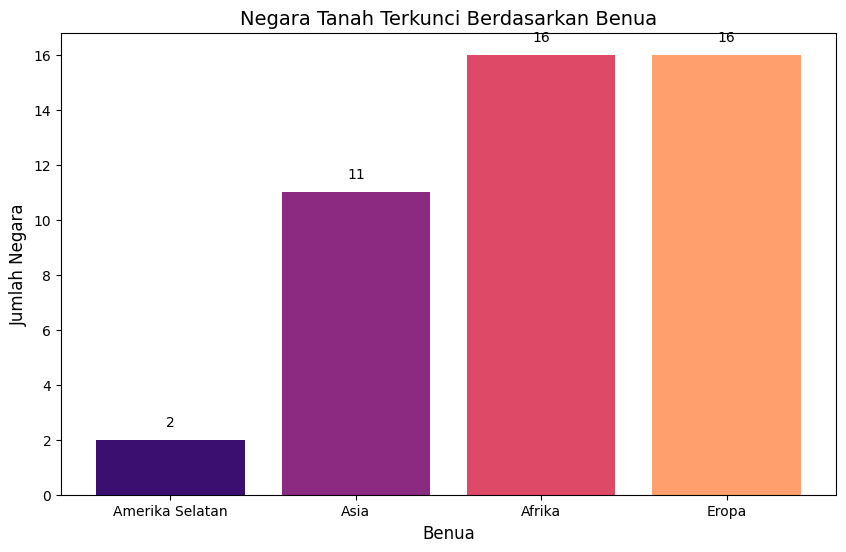

In [ ]:
# Menghitung jumlah negara tanah terkunci berdasarkan benua
landlocked_counts = df[df['Tanah Terkunci']].groupby('Benua').size().sort_values()

# Membuat bar chart vertikal
plt.figure(figsize=(10, 6))
colors = sns.color_palette("magma", len(landlocked_counts))
bars = plt.bar(landlocked_counts.index, landlocked_counts.values, color=colors)

# Menambahkan label pada setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())),
             ha='center', fontsize=10)

# Menambahkan judul dan label
plt.title('Negara Tanah Terkunci Berdasarkan Benua', fontsize=14)
plt.xlabel('Benua', fontsize=12)
plt.ylabel('Jumlah Negara', fontsize=12)
plt.xticks(rotation=0)  # Mengatur rotasi label X menjadi 0 derajat
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh bar chart negara tanah terkunci atau negara yang hanya memiliki wilayah daratan tanpa laut berdasarkan benua diperoleh kesimpulan bahwa hanya ada 3 benua yang memiliki negara dengan tanah terkunci atau negara yang hanya memiliki wilayah daratan tanpa laut paling banyak di Benua Eropa sebanyak 32 negara, Benua Asia sebanyak 11 negara, dan Benua Amerika Selatan sebanyak 2 negara.

Top 5 Negara dengan Kepadatan Penduduk Terbesar di Dunia

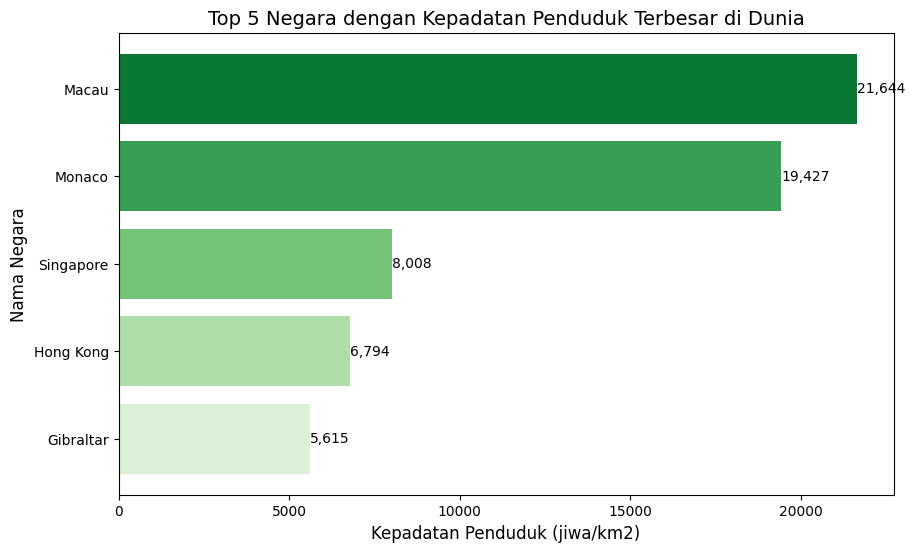

In [ ]:
# Mengambil top 5 negara dengan kepadatan penduduk terbesar
top_5_density = df.nlargest(5, 'Kepadatan Penduduk (jiwa/km2)')[['Nama Negara', 'Kepadatan Penduduk (jiwa/km2)']].sort_values(by='Kepadatan Penduduk (jiwa/km2)', ascending=True)

# Membuat horizontal bar chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Greens", len(top_5_density))  # Gradasi warna hijau
bars = plt.barh(top_5_density['Nama Negara'], top_5_density['Kepadatan Penduduk (jiwa/km2)'], color=colors)

# Menambahkan label pada setiap bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):,}', va='center')

# Menambahkan judul dan label
plt.title('Top 5 Negara dengan Kepadatan Penduduk Terbesar di Dunia', fontsize=14)
plt.xlabel('Kepadatan Penduduk (jiwa/km2)', fontsize=12)
plt.ylabel('Nama Negara', fontsize=12)
plt.show()

**Interpretasi**

Berdasarkan output di atas diperoleh bar chart top 5 negara dengan kepadatan penduduk terbesar di dunia yaitu sebagai berikut.
- Macau merupakan negara dengan kepadatan penduduk paling tinggi nomor 1 di dunia yaitu ada sebanyak 21644 jiwa/km2
- Monaco merupakan negara dengan kepadatan penduduk paling tinggi nomor 2 di dunia yaitu ada sebanyak 19427 jiwa/km2
- Singapore merupakan salah satu negara dengan kepadatan penduduk paling tinggi di dunia yaitu ada sebanyak 8008 jiwa/km2
- Hongkong merupakan salah satu negara dengan kepadatan penduduk paling tinggi di dunia yaitu ada sebanyak 6794 jiwa/km2
- Gibraltar merupakan salah satu negara dengan kepadatan penduduk paling tinggi di dunia yaitu ada sebanyak 5615 jiwa/km2